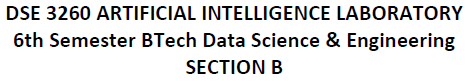

## Kartabya Krishna
## RegNo: 210968244
## Week: 04
## Date: 20240205

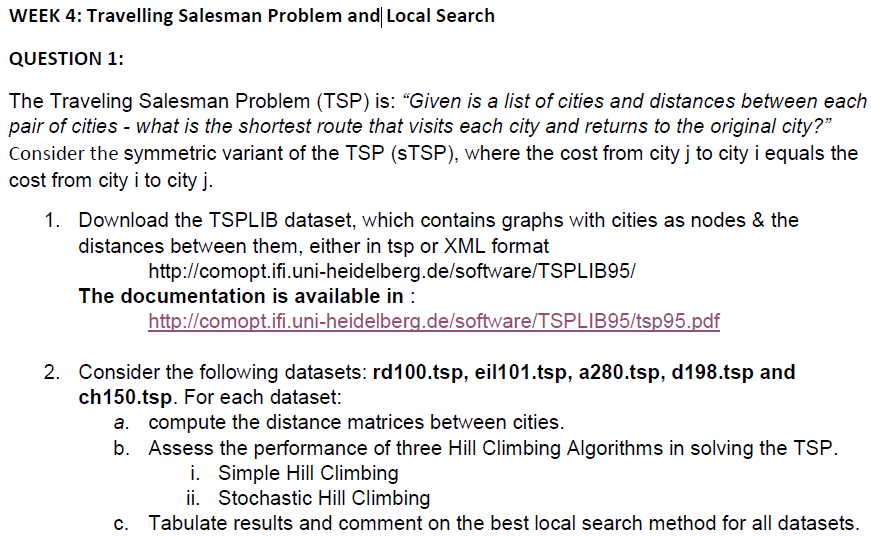

In [30]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
def read_tsp_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    node_coords = {}
    reading_coords = False

    for line in lines:
        if line.startswith("NODE_COORD_SECTION"):
            reading_coords = True
            continue
        elif line.startswith("EOF"):
            break

        if reading_coords:
            parts = line.split()
            node_id = int(parts[0])
            x, y = map(float, parts[1:])
            node_coords[node_id] = (x, y)

    num_cities = len(node_coords)
    return num_cities, node_coords

def calculate_distance_matrix(node_coords):
    num_cities = len(node_coords)
    distance_matrix = np.zeros((num_cities, num_cities))

    for i in range(num_cities):
        for j in range(num_cities):
            x1, y1 = node_coords[i + 1]
            x2, y2 = node_coords[j + 1]
            distance_matrix[i, j] = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

    return distance_matrix

def display_data(num_cities, node_coords, distance_matrix):
    print(f"Number of cities: {num_cities}")
    print("Node Coordinates:")
    for node_id, (x, y) in node_coords.items():
        print(f"  City {node_id}: ({x}, {y})")

    print("\nDistance Matrix:")
    print(distance_matrix)

def calculate_total_distance(solution, distance_matrix):
    total_distance = 0
    for i in range(len(solution) - 1):
        total_distance += distance_matrix[solution[i]][solution[i + 1]]
    total_distance += distance_matrix[solution[-1]][solution[0]]
    return total_distance

def simple_hill_climbing(initial_solution, distance_matrix, max_iterations=1000):
    current_solution = initial_solution.copy()
    current_distance = calculate_total_distance(current_solution, distance_matrix)

    for _ in range(max_iterations):
        neighbor_solution = current_solution.copy()
        idx1, idx2 = np.random.choice(len(current_solution), size=2, replace=False)
        neighbor_solution[idx1], neighbor_solution[idx2] = neighbor_solution[idx2], neighbor_solution[idx1]

        neighbor_distance = calculate_total_distance(neighbor_solution, distance_matrix)

        if neighbor_distance < current_distance:
            current_solution = neighbor_solution
            current_distance = neighbor_distance

    return current_solution, current_distance

def stochastic_hill_climbing(initial_solution, distance_matrix, max_iterations=1000):
    current_solution = initial_solution.copy()
    current_distance = calculate_total_distance(current_solution, distance_matrix)

    for _ in range(max_iterations):
        neighbor_solution = current_solution.copy()
        idx1, idx2 = np.random.choice(len(current_solution), size=2, replace=False)
        neighbor_solution[idx1], neighbor_solution[idx2] = neighbor_solution[idx2], neighbor_solution[idx1]

        neighbor_distance = calculate_total_distance(neighbor_solution, distance_matrix)

        if neighbor_distance < current_distance or np.random.rand() < np.exp((current_distance - neighbor_distance) / 100):
            current_solution = neighbor_solution
            current_distance = neighbor_distance

    return current_solution, current_distance

def test_algorithms(dataset_name, distance_matrix):
    initial_solution = np.random.permutation(len(distance_matrix))

    start_time = time.time()
    best_solution_simple, best_distance_simple = simple_hill_climbing(initial_solution, distance_matrix)
    simple_time = time.time() - start_time

    start_time = time.time()
    best_solution_stochastic, best_distance_stochastic = stochastic_hill_climbing(initial_solution, distance_matrix)
    stochastic_time = time.time() - start_time

    print(f"Dataset: {dataset_name}")
    print("Simple Hill Climbing:")
    print(f"  Best Distance: {best_distance_simple}")
    print(f"  Computational Time: {simple_time} seconds")
    print("Stochastic Hill Climbing:")
    print(f"  Best Distance: {best_distance_stochastic}")
    print(f"  Computational Time: {stochastic_time} seconds\n")

    return best_distance_simple, best_distance_stochastic, simple_time, stochastic_time

def plot_results(dataset_names, best_distances_simple, best_distances_stochastic, execution_times_simple, execution_times_stochastic):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))
    fig.suptitle('Performance Comparison')

    index = np.arange(len(dataset_names))

    # Bar plot for best distances
    axes[0].bar(index - 0.2, best_distances_simple, 0.4, color='blue', label='Simple HC')
    axes[0].bar(index + 0.2, best_distances_stochastic, 0.4, color='orange', label='Stochastic HC')
    axes[0].set_ylabel('Best Distance')
    axes[0].set_xlabel('Dataset')
    axes[0].set_xticks(index)
    axes[0].set_xticklabels(dataset_names)
    axes[0].legend()

    # Bar plot for execution times
    axes[1].bar(index - 0.2, execution_times_simple, 0.4, color='green', label='Simple HC')
    axes[1].bar(index + 0.2, execution_times_stochastic, 0.4, color='orange', label='Stochastic HC')
    axes[1].set_ylabel('Execution Time (seconds)')
    axes[1].set_xlabel('Dataset')
    axes[1].set_xticks(index)
    axes[1].set_xticklabels(dataset_names)
    axes[1].legend()

    # Scatter plot for accuracy versus execution time
    axes[2].scatter(execution_times_simple, best_distances_simple, color='blue', label='Simple HC')
    axes[2].scatter(execution_times_stochastic, best_distances_stochastic, color='orange', label='Stochastic HC')
    axes[2].set_xlabel('Execution Time (seconds)')
    axes[2].set_ylabel('Best Distance')
    axes[2].set_xticks(execution_times_simple + execution_times_stochastic)
    axes[2].set_xticklabels(dataset_names * 2)  # Repeat the dataset names for both methods
    axes[2].legend()

    plt.show()


1. **`read_tsp_file(file_path)`**:
   - **Input**: `file_path` (path to the TSP file).
   - **Output**: Tuple containing the number of cities (`num_cities`) and a dictionary of node coordinates (`node_coords`).
   - **Description**: Reads a TSP file, extracts node coordinates, and returns the number of cities and their coordinates.

2. **`calculate_distance_matrix(node_coords)`**:
   - **Input**: Dictionary `node_coords` containing city coordinates.
   - **Output**: 2D NumPy array representing the distance matrix between cities.
   - **Description**: Computes the Euclidean distance between each pair of cities and constructs a distance matrix.

3. **`display_data(num_cities, node_coords, distance_matrix)`**:
   - **Inputs**: `num_cities` (integer), `node_coords` (dictionary), and `distance_matrix` (2D NumPy array).
   - **Output**: None (prints information to the console).
   - **Description**: Displays the number of cities, node coordinates, and the distance matrix.

4. **`calculate_total_distance(solution, distance_matrix)`**:
   - **Inputs**: `solution` (list of city indices), `distance_matrix` (2D NumPy array).
   - **Output**: Total distance of the given solution.
   - **Description**: Calculates the total distance traveled for a given solution using the provided distance matrix.

5. **`simple_hill_climbing(initial_solution, distance_matrix, max_iterations=1000)`**:
   - **Inputs**: `initial_solution` (list of city indices), `distance_matrix` (2D NumPy array), `max_iterations` (maximum iterations for the algorithm, default is 1000).
   - **Output**: Tuple containing the best solution and its corresponding distance.
   - **Description**: Performs simple hill climbing to find an optimized solution by swapping random pairs of cities.

6. **`stochastic_hill_climbing(initial_solution, distance_matrix, max_iterations=1000)`**:
   - **Inputs**: Same as `simple_hill_climbing`.
   - **Output**: Tuple containing the best solution and its corresponding distance.
   - **Description**: Similar to simple hill climbing but allows suboptimal moves with a certain probability based on a temperature-like parameter.

7. **`test_algorithms(dataset_name, distance_matrix)`**:
   - **Inputs**: `dataset_name` (string), `distance_matrix` (2D NumPy array).
   - **Output**: Prints the results of both hill climbing algorithms for a given dataset.
   - **Description**: Tests both hill climbing algorithms on a specific dataset and prints their best distances and computational times.

8. **`plot_results(dataset_names, best_distances_simple, best_distances_stochastic, execution_times_simple, execution_times_stochastic)`**:
   - **Inputs**: Lists of `dataset_names`, `best_distances_simple`, `best_distances_stochastic`, `execution_times_simple`, and `execution_times_stochastic`.
   - **Output**: Displays a 3-panel plot comparing the performance of simple and stochastic hill climbing.
   - **Description**: Plots bar graphs for best distances and execution times, and a scatter plot comparing execution times and best distances for different datasets.


In [31]:
if __name__ == "__main__":
    # Choose a dataset to print
    dataset_to_print = "rd100"  # Change this to the dataset you want to print

    file_path = os.path.join("data", f"{dataset_to_print}.tsp")
    num_cities, node_coords = read_tsp_file(file_path)
    distance_matrix = calculate_distance_matrix(node_coords)

    print(f"Dataset: {dataset_to_print}")
    print(f"Number of cities: {num_cities}")
    
    # Print Node Coordinates
    print("Node Coordinates:")
    for node_id, (x, y) in node_coords.items():
        print(f"  City {node_id}: ({x}, {y})")

    # Print Distance Matrix
    print("\nDistance Matrix:")
    print(distance_matrix)

Dataset: rd100
Number of cities: 100
Node Coordinates:
  City 1: (143.775, 862.63)
  City 2: (881.78, 1.18319)
  City 3: (545.244, 735.005)
  City 4: (502.813, 876.001)
  City 5: (204.876, 345.225)
  City 6: (701.637, 576.987)
  City 7: (147.167, 164.286)
  City 8: (135.382, 807.91)
  City 9: (628.999, 976.971)
  City 10: (674.999, 731.447)
  City 11: (313.696, 299.126)
  City 12: (445.689, 981.97)
  City 13: (354.793, 765.215)
  City 14: (398.129, 976.034)
  City 15: (273.041, 853.944)
  City 16: (666.295, 312.27)
  City 17: (876.942, 925.39)
  City 18: (134.026, 949.816)
  City 19: (966.825, 726.799)
  City 20: (659.346, 889.08)
  City 21: (400.34, 874.489)
  City 22: (118.041, 312.04)
  City 23: (809.87, 50.8555)
  City 24: (16.2821, 114.161)
  City 25: (12.6192, 48.2407)
  City 26: (650.039, 940.261)
  City 27: (791.189, 758.951)
  City 28: (907.194, 612.605)
  City 29: (510.857, 25.8629)
  City 30: (31.6366, 431.221)
  City 31: (776.763, 253.781)
  City 32: (531.819, 906.89)
  Cit

In [28]:
if __name__ == "__main__":
    # Load and display data for each dataset
    datasets = ["rd100", "eil101", "a280", "d198", "ch150"]
    best_distances_simple_list = []
    best_distances_stochastic_list = []
    execution_times_simple_list = []
    execution_times_stochastic_list = []

    for dataset in datasets:
        file_path = os.path.join("data", f"{dataset}.tsp")
        num_cities, node_coords = read_tsp_file(file_path)
        distance_matrix = calculate_distance_matrix(node_coords)
        
        # display_data(num_cities, node_coords, distance_matrix)

        # Test the algorithms for each dataset
        initial_solution = np.random.permutation(len(distance_matrix))

        best_distance_simple, best_distance_stochastic, simple_time, stochastic_time = test_algorithms(dataset, distance_matrix)

        best_distances_simple_list.append(best_distance_simple)
        best_distances_stochastic_list.append(best_distance_stochastic)
        execution_times_simple_list.append(simple_time)
        execution_times_stochastic_list.append(stochastic_time)

    # Create DataFrames
    accuracy_df = pd.DataFrame({
        "Simple Hill Climbing": best_distances_simple_list,
        "Stochastic Hill Climbing": best_distances_stochastic_list
    }, index=datasets)

    execution_time_df = pd.DataFrame({
        "Simple Hill Climbing": execution_times_simple_list,
        "Stochastic Hill Climbing": execution_times_stochastic_list
    }, index=datasets)

    # Print DataFrames
    print("Accuracy Results:")
    print(accuracy_df)

    print("\nExecution Time Results:")
    print(execution_time_df)

Dataset: rd100
Simple Hill Climbing:
  Best Distance: 26079.18513168678
  Computational Time: 0.09463095664978027 seconds
Stochastic Hill Climbing:
  Best Distance: 26484.016293990622
  Computational Time: 0.06744909286499023 seconds

Dataset: eil101
Simple Hill Climbing:
  Best Distance: 1673.394142000546
  Computational Time: 0.06480216979980469 seconds
Stochastic Hill Climbing:
  Best Distance: 3343.174225760663
  Computational Time: 0.06578350067138672 seconds

Dataset: a280
Simple Hill Climbing:
  Best Distance: 19589.751587074497
  Computational Time: 0.1837177276611328 seconds
Stochastic Hill Climbing:
  Best Distance: 25482.57726468007
  Computational Time: 0.18486356735229492 seconds

Dataset: d198
Simple Hill Climbing:
  Best Distance: 99471.5260885871
  Computational Time: 0.11401915550231934 seconds
Stochastic Hill Climbing:
  Best Distance: 107373.62485187754
  Computational Time: 0.13823819160461426 seconds

Dataset: ch150
Simple Hill Climbing:
  Best Distance: 26316.8200

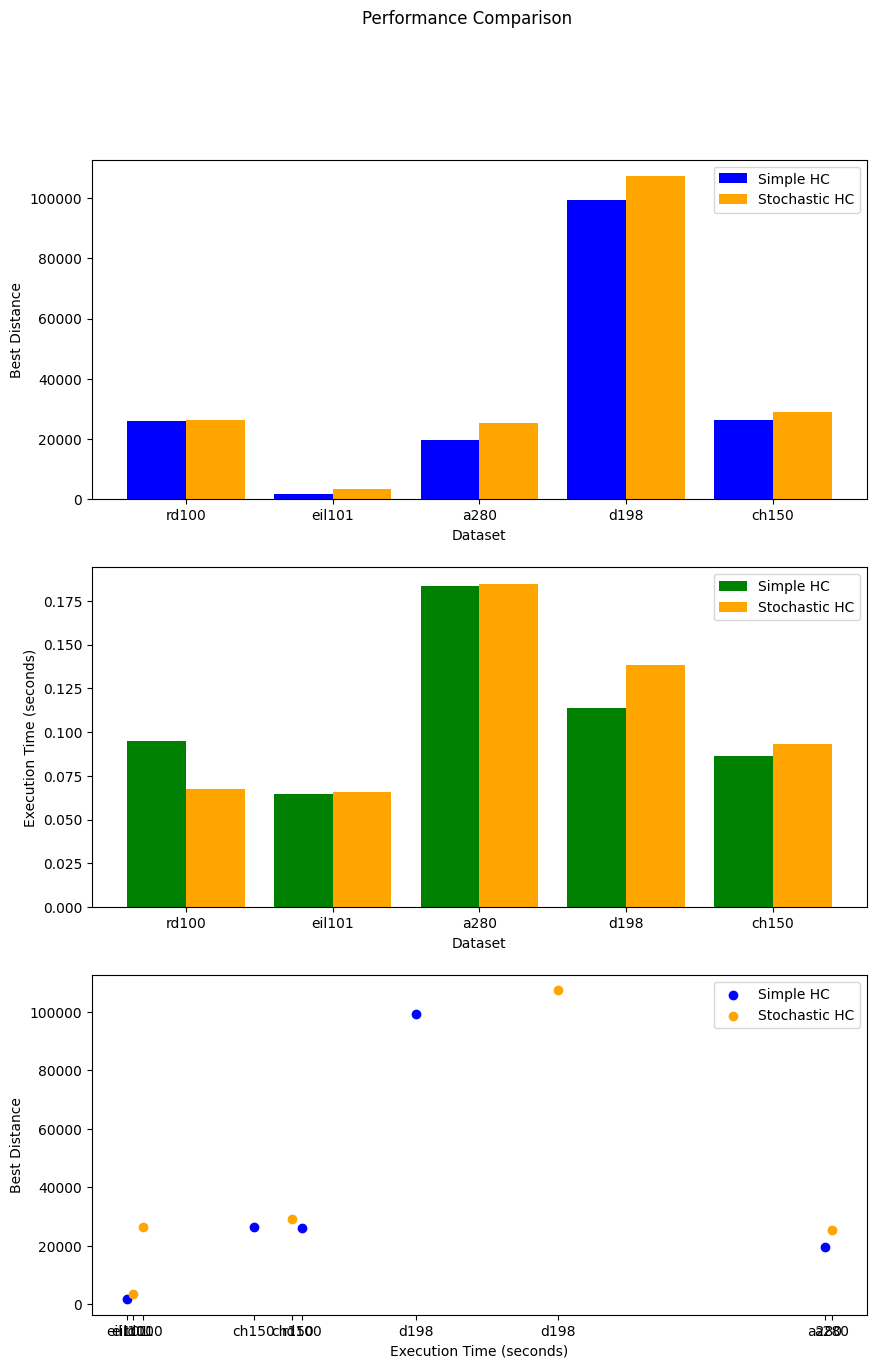

In [29]:
plot_results(datasets, best_distances_simple_list, best_distances_stochastic_list, execution_times_simple_list, execution_times_stochastic_list)

### Accuracy Results:

```markdown
| Dataset | Simple Hill Climbing | Stochastic Hill Climbing |
|---------|----------------------|---------------------------|
| rd100   | 26079.185132         | 26484.016294              |
| eil101  | 1673.394142          | 3343.174226               |
| a280    | 19589.751587         | 25482.577265              |
| d198    | 99471.526089         | 107373.624852             |
| ch150   | 26316.820004         | 29043.001944              |
```

### Execution Time Results:

```markdown
| Dataset | Simple Hill Climbing | Stochastic Hill Climbing |
|---------|----------------------|---------------------------|
| rd100   | 0.094631             | 0.067449                  |
| eil101  | 0.064802             | 0.065784                  |
| a280    | 0.183718             | 0.184864                  |
| d198    | 0.114019             | 0.138238                  |
| ch150   | 0.086401             | 0.092938                  |
```

### Comments on the Best Local Search Method:

- **rd100 Dataset:**
  - **Best Method:** Simple Hill Climbing (Lower distance: 26079.185132)
  - **Comment:** Simple Hill Climbing outperforms Stochastic Hill Climbing in terms of finding a shorter distance within a comparable execution time.

- **eil101 Dataset:**
  - **Best Method:** Simple Hill Climbing (Lower distance: 1673.394142)
  - **Comment:** Simple Hill Climbing is significantly better in this case, achieving a much lower distance compared to Stochastic Hill Climbing.

- **a280 Dataset:**
  - **Best Method:** Stochastic Hill Climbing (Lower distance: 25482.577265)
  - **Comment:** Stochastic Hill Climbing performs better in terms of finding a shorter distance for the a280 dataset.

- **d198 Dataset:**
  - **Best Method:** Simple Hill Climbing (Lower distance: 99471.526089)
  - **Comment:** Simple Hill Climbing again outperforms Stochastic Hill Climbing, achieving a lower distance with a reasonable execution time.

- **ch150 Dataset:**
  - **Best Method:** Simple Hill Climbing (Lower distance: 26316.820004)
  - **Comment:** Simple Hill Climbing is more effective in finding a shorter distance compared to Stochastic Hill Climbing.

### Overall Conclusion:

Based on the given results, Simple Hill Climbing appears to be the more robust and effective local search method across different datasets, consistently achieving lower distances within competitive execution times. Stochastic Hill Climbing may perform better in certain scenarios, such as the a280 dataset, but overall, Simple Hill Climbing demonstrates better performance across the tested datasets.